# Assignment 1

## Import Libraries

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

##### Read CSV File

In [53]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)

##### Basic Functions

In [54]:
# Function to calculate how many missing values are in a column
def how_many_nan(col_name):
    amount = col_name[col_name.isna()].shape[0]
    return amount
# accepts a column name and a list of words that needs to be removed
def remove_words(col_name, unwanted_words):
    pat = r'\b(?:{})\b'.format('|'.join(unwanted_words))
    data[col_name] = data[col_name].str.replace(pat, '')
    data[col_name] = data[col_name].str.strip()


In [55]:
# # convert salary in to categorical data
# data.Q9 = pd.Categorical(data.Q9)

In [56]:
# Label the salary range for data exploration
def encode_salary(salary):
    if "0-10,000" in salary:
        return 5000
    if "10-20,000" in salary:
        return 15000
    if "20-30,000" in salary:
        return 25000
    if "30-40,000" in salary:
        return 35000
    if "40-50,000" in salary:
        return 45000
    if "50-60,000" in salary:
        return 55000
    if "60-70,000" in salary:
        return 65000
    if "70-80,000" in salary:
        return 75000
    if "80-90,000" in salary:
        return 85000
    if "90-100,000" in salary:
        return 95000
    if "100-125,000" in salary:
        return 112500
    if "125-150,000" in salary:
        return 137500
    if "150-200,000" in salary:
        return 175000
    if "200-250,000" in salary:
        return 225000
    if "250-300,000" in salary:
        return 275000
    if "300-400,000" in salary:
        return 250000
    if "400-500,000" in salary:
        return 450000
    if "500,000+" in salary:
        return 550000
# Create a new column with the encoded salary
data["Salary_label"]=data["Q9"].apply(encode_salary)

## Data Exploration

#### Q1: Gender

In [57]:
# Q1: Gender
# Combine gender cateogires less than 150 with Other (prefer not to say, prefer to self-describe)
gender_count = data.Q1.value_counts()
value_mask = data.Q1.isin(gender_count.index[gender_count < 150]) 
data.loc[value_mask,'Q1'] = "Other"
# sns.catplot(x='Q1', y='Salary_label', data=data, order=['Female','Male','Other'], kind="box").fig.set_size_inches(10,5)
# plt.ylim(0, 250000) # limit the y axis to 250000

#### Q2: Age

In [58]:
# Q2: Age
age_count = data.Q2.value_counts()
# Made a new age category of above 70 years old
value_mask = data.Q2.isin(age_count.index[age_count < 180]) 
data.loc[value_mask,'Q2'] = "70+"
# sns.catplot(x='Q2', y='Salary_label', data=data, order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'], kind="box").fig.set_size_inches(10,5)
# plt.ylim(0, 300000) # limit the y axis to 300000

#### Q3: Country

In [59]:
# Q3: Countries
# Categorize any country less than a threshold count in to other
countries_count = data.Q3.value_counts()
value_mask = data.Q3.isin(countries_count.index[countries_count < 200]) 
data.loc[value_mask,'Q3'] = "Other"
# Simplify Name
data['Q3'] = data['Q3'].replace('United States of America', 'USA')
data['Q3'] = data['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'UKGBNI')
# Group together "I do not wish to disclose my location" with "Other"
data['Q3'] = data['Q3'].replace('I do not wish to disclose my location', 'Other')
# sns.catplot(x='Q3', y='Salary_label', data=data, order = ['India','China','Russia','Brazil','Poland','Other','Italy','Spain','France','Germany','Japan','UKGBNI','Canada','Australia','USA'],kind="box").fig.set_size_inches(20,8)
# plt.ylim(0, 300000) # limit the y axis to 250000

#### Q4: Highest level of education 

In [60]:
# Q4: Highest level of education
degree_count = data.Q4.value_counts(normalize=True)
# Simplify category name
data['Q4'] = data['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'Non-conferred')
data['Q4'] = data['Q4'].replace('No formal education past high school', 'Secondary School')
# sns.catplot(x='Q4', y='Salary_label', data=data, order=['I prefer not to answer','Secondary School','Professional degree','Non-conferred','Bachelor’s degree','Master’s degree','Doctoral degree'],kind="box").fig.set_size_inches(20,10)
# plt.ylim(0, 200000) # limit the y axis to 250000

In [61]:
# Since "Non-conferred" and "I prefer not to answer" show similar salary earnings, I can combine them
data['Q4'] = data['Q4'].replace('Non-conferred', 'Other')
data['Q4'] = data['Q4'].replace('I prefer not to answer', 'Other')
data['Q4'] = data['Q4'].replace('Bachelor’s degree', 'Other')
# sns.catplot(x='Q4', y='Salary_label', data=data, order=['Other','Secondary School','Professional degree','Master’s degree','Doctoral degree'],kind="box").fig.set_size_inches(20,10)
# plt.ylim(0, 200000) # limit the y axis to 250000

#### Q5: Major in University/College

In [62]:
# Q5: Major in University/College
# There is 135 missing values
a = data[data['Q5'].isna()]
how_many_nan(data['Q5'])
# Simplified naming
data['Q5'] = data['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business')
data['Q5'] = data['Q5'].replace('Information technology, networking, or system administration', 'Information technology')
data['Q5'] = data['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medical/Life Science')
data['Q5'] = data['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science')
data['Q5'] = data['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities')
data['Q5'] = data['Q5'].replace('Mathematics or statistics', 'Math')
data['Q5'] = data['Q5'].replace('Computer science (software engineering, etc.)', 'Comp. Sci & Soft. Eng.')
data['Q5'] = data['Q5'].replace('Engineering (non-computer focused)', 'Engineering (Non. Soft. Eng.)')
# Grouped together non-STEM with others
data['Q5'] = data['Q5'].replace('I never declared a major', 'Other')
data['Q5'] = data['Q5'].replace('Fine arts or performing arts', 'Other')
data['Q5'] = data['Q5'].replace('Humanities', 'Other')
# sns.catplot(x='Q5', y='Salary_label', data=data, kind="box").fig.set_size_inches(25,10)
# plt.ylim(0, 200000) # limit the y axis to 250000

#### Q6: Position Title

In [63]:
# Q6: Position Title
# Eliminate position titles less than a threshold
title_count = data.Q6.value_counts()
value_mask = data.Q6.isin(title_count.index[title_count < 200]) 
data.loc[value_mask,'Q6'] = "Other"
# sns.catplot(x='Q6', y='Salary_label', data=data, kind="box").fig.set_size_inches(25,10)
# plt.ylim(0, 300000) # limit the y axis to 250000

#### Q7: Position Title 

In [64]:
# Q7: Industry
industry_count = data.Q7.value_counts()
value_mask = data.Q7.isin(industry_count.index[industry_count < 200]) 
data.loc[value_mask,'Q7'] = "Other"
# sns.catplot(x='Q7', y='Salary_label', data=data, kind="box").fig.set_size_inches(40,10)
# plt.ylim(0, 200000) # limit the y axis to 250000

#### Q8: Years of Experience

In [65]:
# Q8: Years of Experience
# There's 76 missing values - Should just remove it
how_many_nan(data['Q8'])
# Recategorize YOE
data['Q8'] = data['Q8'].replace('0-1', '0-3') # 0-3 years
data['Q8'] = data['Q8'].replace('1-2', '0-3')
data['Q8'] = data['Q8'].replace('2-3', '0-3')
data['Q8'] = data['Q8'].replace('3-4', '3-5') # 3-5 years
data['Q8'] = data['Q8'].replace('4-5', '3-5')
data['Q8'] = data['Q8'].replace('20-25', '20-30') # 20-30 years
data['Q8'] = data['Q8'].replace('25-30', '20-30')
# sns.catplot(x='Q8', y='Salary_label', data=data, order=['0-3','3-5','5-10','10-15','15-20','20-30','30 +'], kind="box").fig.set_size_inches(10,5)
# plt.ylim(0, 300000) # limit the y axis to 300000

#### Q40

In [66]:
# Clean up Q40
Q40_words = ['Independent', 'projects', 'are', 'important', 'than', 'academic', 'achievements']
remove_words('Q40', Q40_words)
# 3763 missing values
how_many_nan(data['Q40'])

3763

### Encode Features

In [70]:
class combine_col:
    # Function to concatenate multiple columns of num in to one single column (by addition)
    def sum_int(col_name, start, end):
        one = data[col_name+'_Part_'+str(start)]
        two = data[col_name+'_Part_'+str(start+1)]
        col_combined = one+two
        # iterate from start to end
        for i in range(start+2, end+1):
            next_col = data[col_name+'_Part_'+str(i)]
            col_combined = col_combined+next_col
        # if the sum of specified columns equal to zero, this row was originally a NaN
        col_combined = col_combined.replace(0, np.nan)
        return col_combined
# Class for filling in information
class fill_info:
    def nan_text(col_name,start, end):
        for i in range (start, end+1): #nan2zero
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(0)
        # Before converting all texts to 1, save a list of the categories
        features_list = list()
        for i in range (start, end+1): # save features to a list
            spot = data[col_name+'_Part_'+str(i)].ne(0).idxmax()
            feature = data[col_name+'_Part_'+str(i)].iloc[spot-1]
            features_list.append(feature)
        for i in range (start, end+1): #text2one
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].astype(bool).astype(int)
        return features_list
    def col2num(col_name, start, end):
        for i in range (start, end+1): #fill nan with zero
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(0)
        for i in range (start, end+1): # convert everything to type float
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].astype(float)
# encode columns with num
def encode_col(col_name, start, end):
    features = fill_info.nan_text(col_name, start, end)
    combined = combine_col.sum_int(col_name, start, end)
    return features, combined
# creates dummy columns and drops the original column
def dummy(col_name):
    global data
    dummy = pd.get_dummies(data[col_name], prefix=col_name)
    data.drop([col_name], axis=1) # need to drop the original columns
    return dummy

##### Encode columns that require dummy variables

In [71]:
Q1_dummies = dummy('Q1')
Q2_dummies = dummy('Q2')
Q3_dummies = dummy('Q3')
Q4_dummies = dummy('Q4')
Q5_dummies = dummy('Q5')
Q6_dummies = dummy('Q6')
Q7_dummies = dummy('Q7')
Q8_dummies = dummy('Q8')
Q10_dummies = dummy('Q10')
Q12_dummies = dummy('Q12_MULTIPLE_CHOICE')
Q17_dummies = dummy('Q17')
Q18_dummies = dummy('Q18')
Q20_dummies = dummy('Q20')
Q22_dummies = dummy('Q22')
Q23_dummies = dummy('Q23')
Q24_dummies = dummy('Q24')
Q25_dummies = dummy('Q25')
Q26_dummies = dummy('Q26')
Q32_dummies = dummy('Q32')
Q37_dummies = dummy('Q37')
Q39P1_dummies = dummy('Q39_Part_1')
Q39P2_dummies = dummy('Q39_Part_2')
Q40_dummies = dummy('Q40')
Q41P1_dummies = dummy('Q41_Part_1')
Q41P2_dummies = dummy('Q41_Part_2')
Q41P3_dummies = dummy('Q41_Part_3')
Q43_dummies = dummy('Q43')
Q46_dummies = dummy('Q46')
Q48_dummies = dummy('Q48')

In [72]:
data.dtypes #suppose to drop each of the original dummy columns but it is currently not

Unnamed: 0                               int64
Time from Start to Finish (seconds)     object
Q1                                      object
Q1_OTHER_TEXT                           object
Q2                                      object
Q3                                      object
Q4                                      object
Q5                                      object
Q6                                      object
Q6_OTHER_TEXT                           object
Q7                                      object
Q7_OTHER_TEXT                           object
Q8                                      object
Q9                                      object
Q10                                     object
Q11_Part_1                              object
Q11_Part_2                              object
Q11_Part_3                              object
Q11_Part_4                              object
Q11_Part_5                              object
Q11_Part_6                              object
Q11_Part_7   

In [18]:
# these two Q's are percentage based
fill_info.col2num('Q34', 1, 6)# Q34
Q34_combined = combine_col.sum_int('Q34',1,6)
fill_info.col2num('Q35', 1, 6)# Q35
Q35_combined = combine_col.sum_int('Q35',1,6)

##### Encode categorical data

In [19]:
Q11_features, Q11_combined = encode_col('Q11', 1, 7)
Q13_features, Q13_combined = encode_col('Q13', 1, 15)
Q14_features, Q14_combined = encode_col('Q14', 1, 11)
Q15_features, Q15_combined = encode_col('Q15', 1, 7)
Q16_features, Q16_combined = encode_col('Q16', 1, 18)
Q19_features, Q19_combined = encode_col('Q19', 1, 19)
Q21_features, Q21_combined = encode_col('Q21', 1, 13)
Q27_features, Q27_combined = encode_col('Q27', 1, 20)
Q28_features, Q28_combined = encode_col('Q28', 1, 43)
Q29_features, Q29_combined = encode_col('Q29', 1, 28)
Q30_features, Q30_combined = encode_col('Q30', 1, 25)
Q31_features, Q31_combined = encode_col('Q31', 1, 12)
Q33_features, Q33_combined = encode_col('Q33', 1, 11)
Q36_features, Q36_combined = encode_col('Q36', 1, 13)
Q38_features, Q38_combined = encode_col('Q38', 1, 22)
Q42_features, Q42_combined = encode_col('Q42', 1, 5)
Q44_features, Q44_combined = encode_col('Q44', 1, 6)
Q45_features, Q45_combined = encode_col('Q45', 1, 6)
Q47_features, Q47_combined = encode_col('Q47', 1, 16)
Q49_features, Q49_combined = encode_col('Q49', 1, 12)
Q50_features, Q50_combined = encode_col('Q50', 1, 8)

In [ ]:
# currently new_data and data isnt working, the idea is to drop the original column aftter the dummy function

##### Concatenate dummy and categorical features to find NaN values

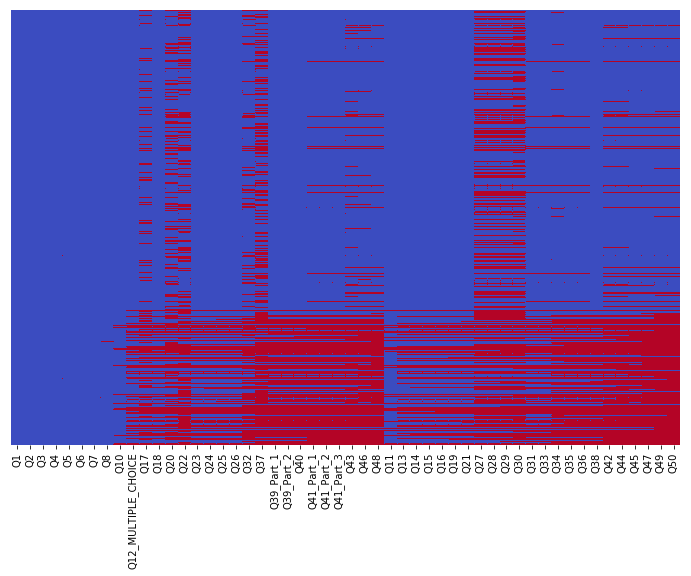

In [20]:
# new data frame with all the combined columns
cat_encoded = pd.concat([Q11_combined, Q13_combined, Q14_combined, Q15_combined, Q16_combined, Q19_combined, Q21_combined, Q27_combined, Q28_combined, Q29_combined, Q30_combined, Q31_combined, Q33_combined, Q34_combined, Q35_combined, Q36_combined, Q38_combined, Q42_combined, Q44_combined, Q45_combined, Q47_combined, Q49_combined, Q50_combined],axis=1)
cat_encoded.columns = ['Q11','Q13','Q14','Q15','Q16','Q19','Q21','Q27','Q28','Q29','Q30','Q31','Q33','Q34','Q35','Q36','Q38','Q42','Q44','Q45','Q47','Q49','Q50']
# new data frame with all the ones that were made dummy
dummy_encoded = pd.concat([data['Q1'],data['Q2'],data['Q3'],data['Q4'],data['Q5'],data['Q6'],data['Q7'],data['Q8'],data['Q10'],data['Q12_MULTIPLE_CHOICE'],data['Q17'],data['Q18'],data['Q20'],data['Q22'],data['Q23'],data['Q24'],data['Q25'],data['Q26'],data['Q32'],data['Q37'],data['Q39_Part_1'],data['Q39_Part_2'],data['Q40'],data['Q41_Part_1'],data['Q41_Part_2'],data['Q41_Part_3'],data['Q43'],data['Q46'],data['Q48']], axis=1)
# Check missing values from the whole data set
encoded_all = pd.concat([dummy_encoded, cat_encoded], axis=1)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(encoded_all.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [ ]:
# need to deal with NaN

In [23]:
new_data.dtypes

AttributeError: 'NoneType' object has no attribute 'dtypes'

#### Cleaned Data

In [22]:
# concatenate all dummy data
dummy_data = pd.concat([Q1_dummies, Q2_dummies, Q3_dummies, Q4_dummies, Q5_dummies, Q6_dummies, Q7_dummies, Q8_dummies, Q10_dummies, Q12_dummies, Q17_dummies, Q18_dummies, Q20_dummies, Q22_dummies, Q23_dummies, Q24_dummies, Q25_dummies, Q26_dummies, Q32_dummies, Q37_dummies, Q39P1_dummies, Q39P2_dummies, Q40_dummies, Q41P1_dummies, Q41P2_dummies, Q41P3_dummies, Q43_dummies, Q46_dummies, Q48_dummies], axis=1)
# drop any column with "TEXT" in title
new_data.drop([col for col in data.columns if 'TEXT' in col],axis=1,inplace=True)
# drop other unecessary columns
new_data.drop(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'index', 'Salary_label'], axis=1, inplace=True)
# form cleaned data
cleaned_data = pd.concat([dummy_data, new_data], axis=1)

AttributeError: 'NoneType' object has no attribute 'drop'

In [22]:
cleaned_data.dtypes

Q1_Female               uint8
Q1_Male                 uint8
Q1_Other                uint8
Q2_18-21                uint8
Q2_22-24                uint8
Q2_25-29                uint8
Q2_30-34                uint8
Q2_35-39                uint8
Q2_40-44                uint8
Q2_45-49                uint8
Q2_50-54                uint8
Q2_55-59                uint8
Q2_60-69                uint8
Q2_70+                  uint8
Q3_Australia            uint8
Q3_Brazil               uint8
Q3_Canada               uint8
Q3_China                uint8
Q3_France               uint8
Q3_Germany              uint8
Q3_India                uint8
Q3_Italy                uint8
Q3_Japan                uint8
Q3_Other                uint8
Q3_Poland               uint8
Q3_Russia               uint8
Q3_Spain                uint8
Q3_UKGBNI               uint8
Q3_USA                  uint8
Q4_Doctoral degree      uint8
                       ...   
Q47_Part_12             int64
Q47_Part_13             int64
Q47_Part_1

### Feature Selection

In [64]:
X = cleaned_data.drop(['Q9'],axis=1)
y = cleaned_data['Q9']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [48]:
# clf = linear_model.Lasso(alpha=0.1)
# clf.fit(X_train, y_train)

In [49]:
# scaler = StandardScaler()
# scaler.fit(X_train.fillna(0))

In [67]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(X_train, y_train)

/home/aaron/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/aaron/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [68]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [53]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 595
selected features: 591
features with coefficients shrank to zero: 4743


In [54]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

IndexError: boolean index did not match indexed array along dimension 0; dimension is 595 but corresponding boolean dimension is 10710

### Logistic Regression

In [43]:
X = cleaned_data.drop(['Q9'],axis=1)
y = cleaned_data['Q9']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [45]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
model = LogisticRegression()    
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.784%
Fold 2: Accuracy: 0.73%
Fold 3: Accuracy: 0.711%
Fold 4: Accuracy: 0.747%
Fold 5: Accuracy: 0.75%
Fold 6: Accuracy: 0.746%
Fold 7: Accuracy: 0.771%
Fold 8: Accuracy: 0.767%
Fold 9: Accuracy: 0.737%
Fold 10: Accuracy: 0.772%
Average Score: 75.161%(2.114%)
